In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Let's load the California House Pricing Dataset

In [10]:
from sklearn.datasets import fetch_california_housing
housing = fetch_california_housing()

In [12]:
housing.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'feature_names', 'DESCR'])

In [42]:
housing.target_names

['MedHouseVal']

In [22]:
print(housing.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block group
        - HouseAge      median house age in block group
        - AveRooms      average number of rooms per household
        - AveBedrms     average number of bedrooms per household
        - Population    block group population
        - AveOccup      average number of household members
        - Latitude      block group latitude
        - Longitude     block group longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived

# Preparing the dataset

In [27]:
dataset = pd.DataFrame(housing.data, columns = housing.feature_names )

In [44]:
dataset['Price'] = housing.target

In [45]:
dataset.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Price
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [46]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
 8   Price       20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [47]:
dataset.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Price
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


In [48]:
dataset.isnull().sum()

MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
Price         0
dtype: int64

In [49]:
dataset.corr()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Price
MedInc,1.000000,-0.119034,0.326895,-0.062040,0.004834,0.018766,-0.079809,-0.015176,0.688075
HouseAge,-0.119034,1.000000,-0.153277,-0.077747,-0.296244,0.013191,0.011173,-0.108197,0.105623
AveRooms,0.326895,-0.153277,1.000000,0.847621,-0.072213,-0.004852,0.106389,-0.027540,0.151948
AveBedrms,-0.062040,-0.077747,0.847621,1.000000,-0.066197,-0.006181,0.069721,0.013344,-0.046701
Population,0.004834,-0.296244,-0.072213,-0.066197,1.000000,0.069863,-0.108785,0.099773,-0.024650
AveOccup,0.018766,0.013191,-0.004852,-0.006181,0.069863,1.000000,0.002366,0.002476,-0.023737
Latitude,-0.079809,0.011173,0.106389,0.069721,-0.108785,0.002366,1.000000,-0.924664,-0.144160
Longitude,-0.015176,-0.108197,-0.027540,0.013344,0.099773,0.002476,-0.924664,1.000000,-0.045967
Price,0.688075,0.105623,0.151948,-0.046701,-0.024650,-0.023737,-0.144160,-0.045967,1.000000


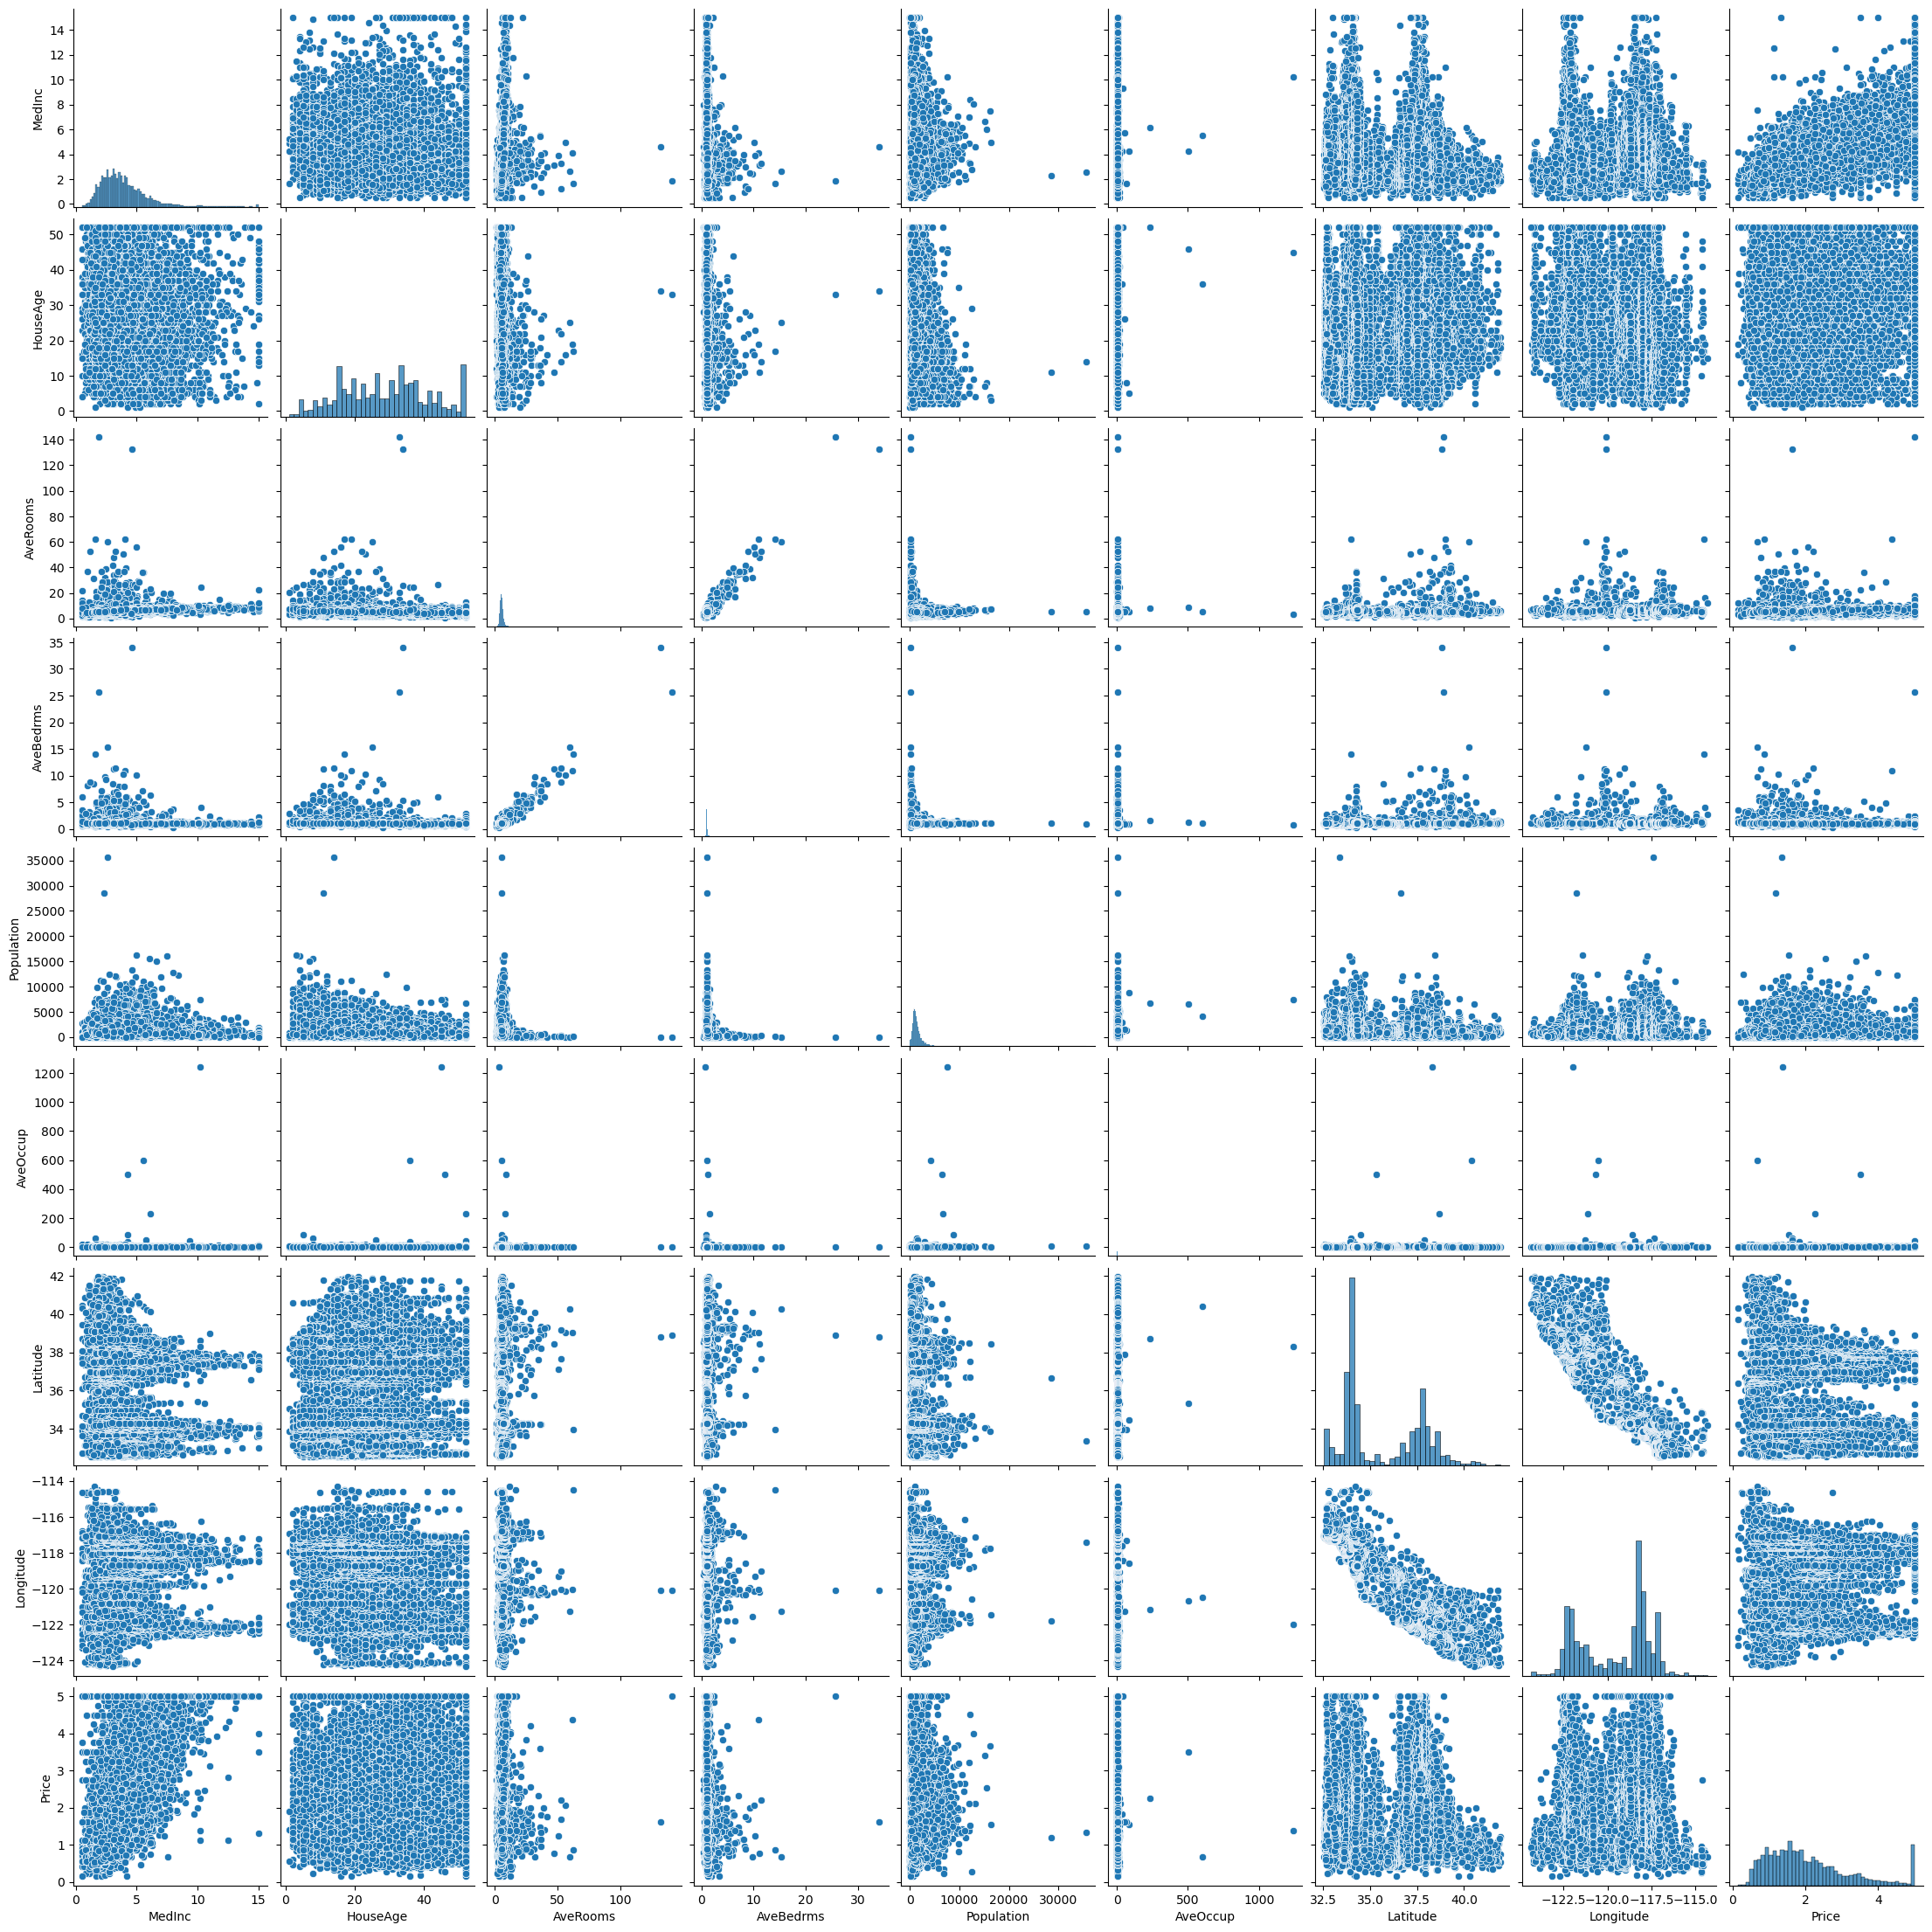

In [50]:
import seaborn as sns
sns.pairplot(dataset)

# Analyzing the correlated features

Text(0, 0.5, 'Price')

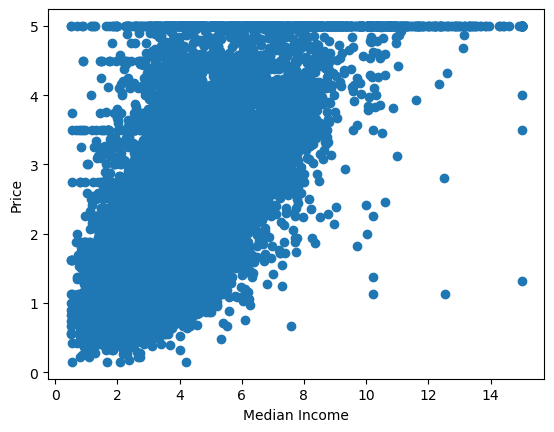

In [52]:
plt.scatter(dataset['MedInc'],dataset['Price'])
plt.xlabel('Median Income')
plt.ylabel('Price')

Text(0, 0.5, 'Price')

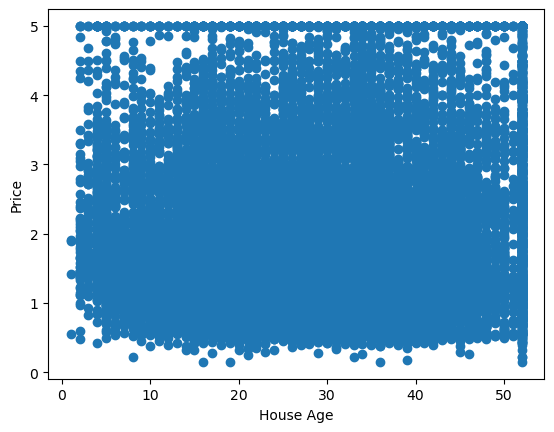

In [54]:
plt.scatter(dataset['HouseAge'],dataset['Price'])
plt.xlabel('House Age')
plt.ylabel('Price')

Text(0, 0.5, 'Price')

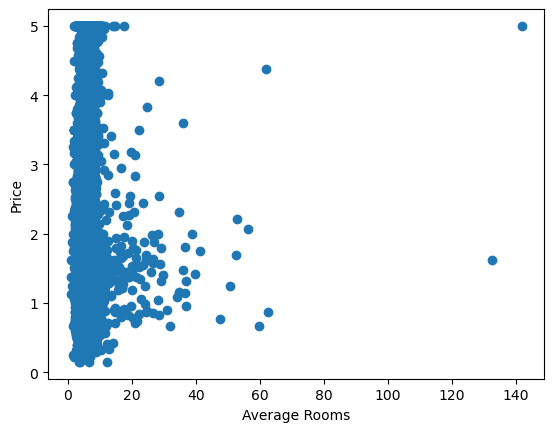

In [55]:
plt.scatter(dataset['AveRooms'],dataset['Price'])
plt.xlabel('Average Rooms')
plt.ylabel('Price')

Text(0, 0.5, 'Price')

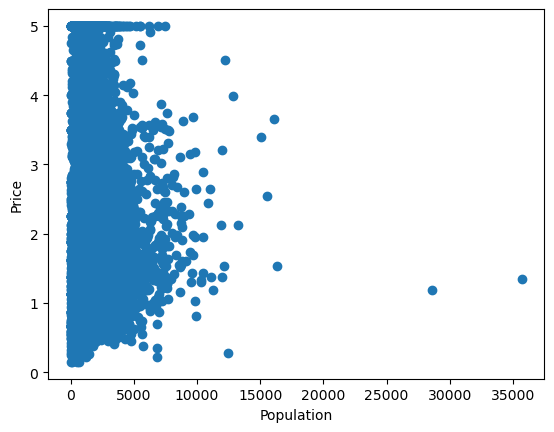

In [56]:
plt.scatter(dataset['Population'],dataset['Price'])
plt.xlabel('Population')
plt.ylabel('Price')

Text(0, 0.5, 'Price')

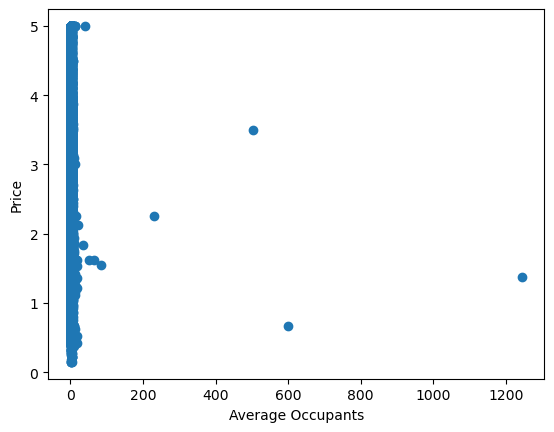

In [57]:
plt.scatter(dataset['AveOccup'],dataset['Price'])
plt.xlabel('Average Occupants')
plt.ylabel('Price')

<AxesSubplot:xlabel='MedInc', ylabel='Price'>

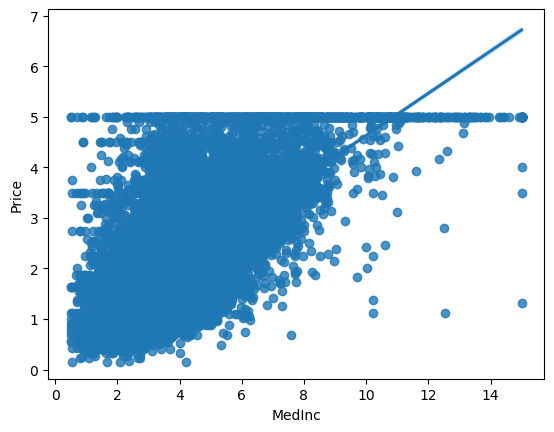

In [59]:
sns.regplot(x='MedInc',y='Price',data=dataset)

<AxesSubplot:xlabel='HouseAge', ylabel='Price'>

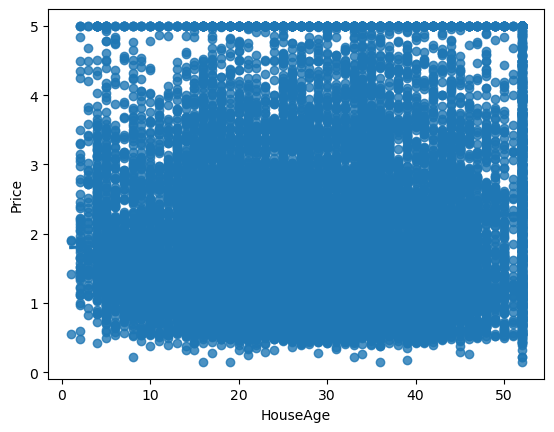

In [60]:
sns.regplot(x='HouseAge',y='Price',data=dataset)

<AxesSubplot:xlabel='AveRooms', ylabel='Price'>

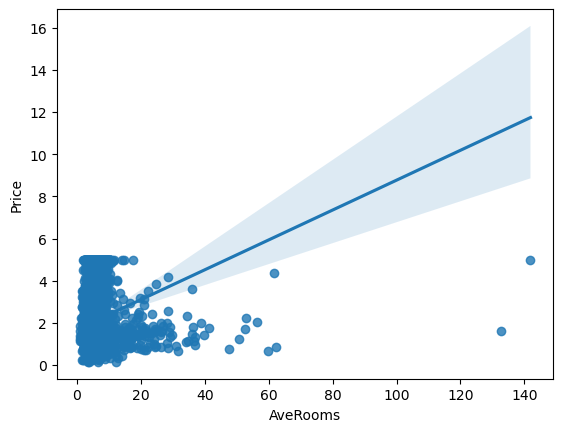

In [61]:
sns.regplot(x='AveRooms',y='Price',data=dataset)

<AxesSubplot:xlabel='AveBedrms', ylabel='Price'>

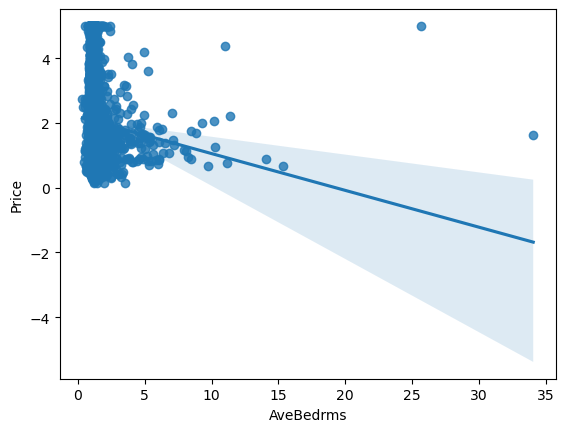

In [62]:
sns.regplot(x='AveBedrms',y='Price',data=dataset)

<AxesSubplot:xlabel='Population', ylabel='Price'>

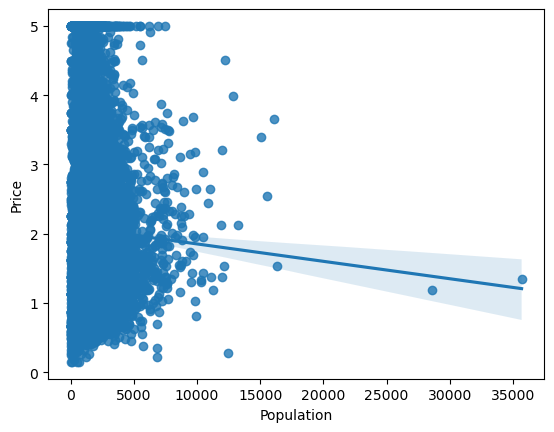

In [63]:
sns.regplot(x='Population',y='Price',data=dataset)

<AxesSubplot:xlabel='AveOccup', ylabel='Price'>

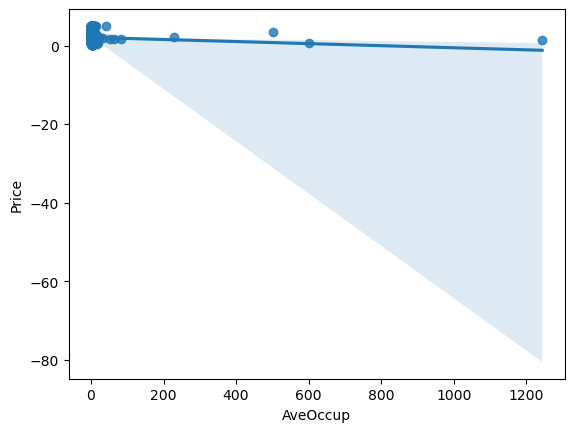

In [64]:
sns.regplot(x='AveOccup',y='Price',data=dataset)

<AxesSubplot:xlabel='Latitude', ylabel='Price'>

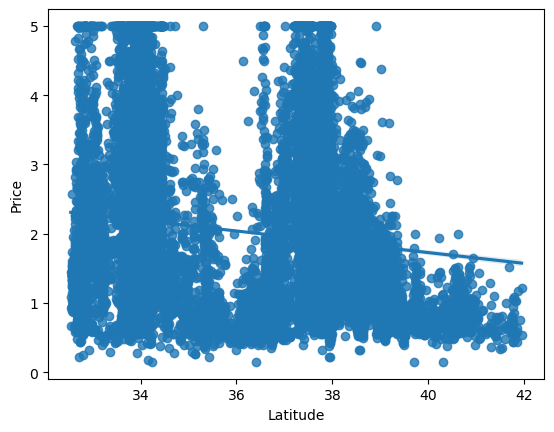

In [65]:
sns.regplot(x='Latitude',y='Price',data=dataset)

In [73]:
## Independent and dependent features

X = dataset.iloc[:,:-1]
y = dataset.iloc[:,-1]

In [75]:
X.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [76]:
y.head()

0    4.526
1    3.585
2    3.521
3    3.413
4    3.422
Name: Price, dtype: float64

In [77]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [80]:
y_train.head()

7061     1.93800
14689    1.69700
17323    2.59800
10056    1.36100
15750    5.00001
Name: Price, dtype: float64

In [81]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [82]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [85]:
X_test

array([[-1.1526893 , -0.28346293, -0.50781822, ...,  0.06127763,
         0.19166399,  0.28664112],
       [-0.70640568,  0.11294728, -0.16252032, ..., -0.03551561,
        -0.23911452,  0.06196251],
       [-0.20830675,  1.85715216, -0.59546738, ..., -0.14215427,
         1.00639726, -1.42590916],
       ...,
       [-0.19155996, -0.99700129, -0.6830438 , ..., -0.06058827,
        -0.92742367,  0.8358555 ],
       [-0.11911302, -1.47269353,  0.02607207, ...,  0.03461374,
         1.01576201, -0.84673764],
       [-0.43304974, -0.91771925, -0.84872893, ..., -0.0407528 ,
        -0.70266966,  0.67109119]])

In [116]:
X_test[0]

array([-1.1526893 , -0.28346293, -0.50781822, -0.16927816, -0.03151006,
        0.06127763,  0.19166399,  0.28664112])

# Model Training

In [86]:
from sklearn.linear_model import LinearRegression

In [87]:
regression = LinearRegression()

In [89]:
regression.fit(X_train, y_train)

LinearRegression()

In [90]:
#print the regression coefficient and intercept
print(regression.coef_)

[ 8.49221760e-01  1.22119309e-01 -2.99558449e-01  3.48409673e-01
 -8.84488134e-04 -4.16980388e-02 -8.93855649e-01 -8.68616688e-01]


In [92]:
print(regression.intercept_)

2.0692396089424165


In [94]:
# on which parameter the model has been trained
regression.get_params()

{'copy_X': True,
 'fit_intercept': True,
 'n_jobs': None,
 'normalize': 'deprecated',
 'positive': False}

In [95]:
#regression with Test data
reg_predict = regression.predict(X_test)

In [96]:
reg_predict

array([0.72604907, 1.76743383, 2.71092161, ..., 2.07465531, 1.57371395,
       1.82744133])

# Assumptions

Text(0, 0.5, 'reg_predict')

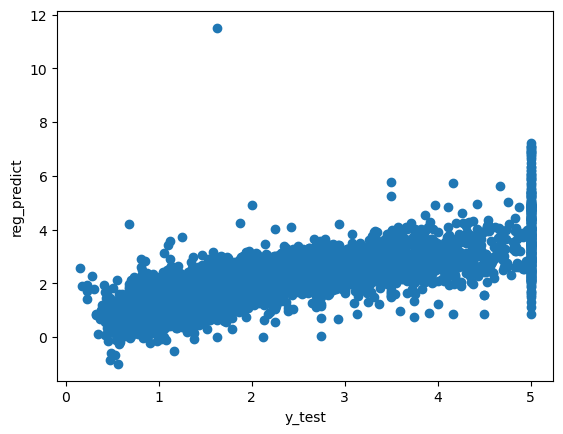

In [98]:
plt.scatter(y_test, reg_predict)
plt.xlabel('y_test')
plt.ylabel('reg_predict')

In [99]:
# Residuals
residual = y_test - reg_predict 

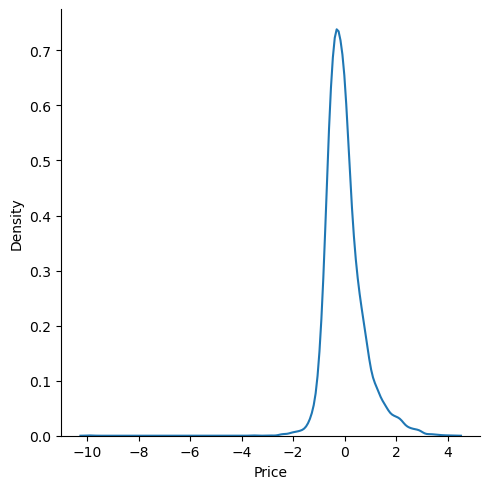

In [101]:
#plot the residuals
sns.displot(residual, kind='kde')

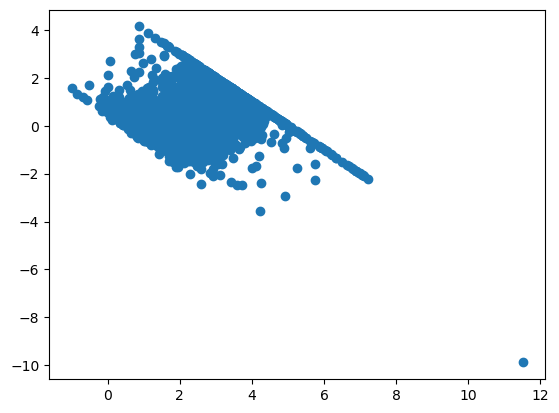

In [102]:
plt.scatter(reg_predict, residual)

In [105]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

print(mean_absolute_error(y_test, reg_predict))
print(mean_squared_error(y_test, reg_predict))
print(np.sqrt(mean_squared_error(y_test, reg_predict)))
print(r2_score(y_test, reg_predict))

0.5272474538305955
0.5305677824766752
0.7284008391515452
0.5957702326061664


# New data prediction

In [122]:
housing.data

array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
          37.88      , -122.23      ],
       [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
          37.86      , -122.22      ],
       [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
          37.85      , -122.24      ],
       ...,
       [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
          39.43      , -121.22      ],
       [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
          39.43      , -121.32      ],
       [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
          39.37      , -121.24      ]])

In [128]:
X_test.shape

(6192, 8)

In [130]:
#transformation of new data
regression.predict(scaler.transform(housing.data[0].reshape(1,-1)))

C:\Users\shihamf\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([4.14333441])

In [132]:
housing.target[0]

4.526

# Picking the model file for deployment

In [133]:
import pickle

In [134]:
pickle.dump(regression, open('regmodel.pkl','wb'))

In [136]:
pickled_model = pickle.load(open('regmodel.pkl','rb'))

In [138]:
pickled_model.predict(scaler.transform(housing.data[0].reshape(1,-1)))

C:\Users\shihamf\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([4.14333441])